In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
data = pd.read_csv("C:/fintech_service/Data/creaditcard_fraud_data.csv")
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


* trans_date_trans_time (object): 거래가 발생한 날짜 및 시간
* cc_num (int64): 사용된 신용카드 번호를 나타내는 숫자
* merchant (object): 상점명 또는 거래가 발생한 가맹점의 이름
* category (object): 거래가 발생한 상품 또는 서비스의 범주
* amt (float64): 해당 거래의 거래 금액
* first (object): 카드 소유자의 **이름
* last (object): 카드 소유자의 성
* gender (object): 카드 소유자의 성별
* street (object): 카드 소유자의 거주지 주소의 거리
* city (object): 카드 소유자의 거주지 도시
* state (object): 카드 소유자의 거주지 주(State)
* zip (int64): 카드 소유자의 거주지 우편번호
* lat (float64): 카드 소유자의 거주지 위도(latitude)
* long (float64): 카드 소유자의 거주지 경도(longitude)
* city_pop (int64): 카드 소유자가 거주하는 도시의 인구 수
* job (object): 카드 소유자의 직업
* dob (object): 카드 소유자의 출생일(Date of Birth)
* trans_num (object): 각 거래에 할당된 고유 거래 번호
* unix_time (int64): 거래가 발생한 시간을 유닉스 타임스탬프 형식으로 나타낸 값
* merch_lat (float64): 가맹점의 위도(latitude) 거래가 발생한 상점의 위치 정보
* merch_long (float64): 가맹점의 경도(longitude)
* is_fraud (int64): 거래가 사기(fraud)여부를 나타내는 열입니다. 1은 사기, 0은 정상 거래

* 데이터 전처리(결측값, 이상값)
* EDA
* Feature Engineering
* Feature Selection
* 데이터 분할
* k-fold 교차검증, gridsearch, randomsearch, 데이터 중복 pipeline 이용해서 모델 3가지로 비교 분석


In [17]:
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 19 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1852394 non-null  int64  
 1   category    1852394 non-null  int64  
 2   amt         1852394 non-null  float64
 3   gender      1852394 non-null  int64  
 4   city        1852394 non-null  int64  
 5   state       1852394 non-null  int64  
 6   lat         1852394 non-null  float64
 7   long        1852394 non-null  float64
 8   city_pop    1852394 non-null  int64  
 9   job         1852394 non-null  int64  
 10  unix_time   1852394 non-null  int64  
 11  merch_lat   1852394 non-null  float64
 12  merch_long  1852394 non-null  float64
 13  is_fraud    1852394 non-null  int64  
 14  age         1852394 non-null  int32  
 15  year        1852394 non-null  int32  
 16  month       1852394 non-null  int32  
 17  day         1852394 non-null  int32  
 18  hour        1852394 no

In [4]:
data.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Feature Engineering

In [5]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
# 1. 제거할 컬럼들을 드롭
drop_columns = ['cc_num', 'first', 'last', 'street', 'zip', 'trans_num']
data = data.drop(columns=drop_columns)

In [7]:
# 2. 나이(age) 변수 생성 (dob에서 변환 가능할 경우)
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')
data['age'] = 2024 - data['dob'].dt.year  # 현재 연도를 기준으로 나이를 계산

In [8]:
# dob 컬럼은 이제 더 이상 필요 없으므로 제거
data = data.drop(columns=['dob'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   merchant               object 
 2   category               object 
 3   amt                    float64
 4   gender                 object 
 5   city                   object 
 6   state                  object 
 7   lat                    float64
 8   long                   float64
 9   city_pop               int64  
 10  job                    object 
 11  unix_time              int64  
 12  merch_lat              float64
 13  merch_long             float64
 14  is_fraud               int64  
 15  age                    int32  
dtypes: float64(5), int32(1), int64(3), object(7)
memory usage: 219.1+ MB


In [10]:
data.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,36
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,46
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,62
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,57
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,38


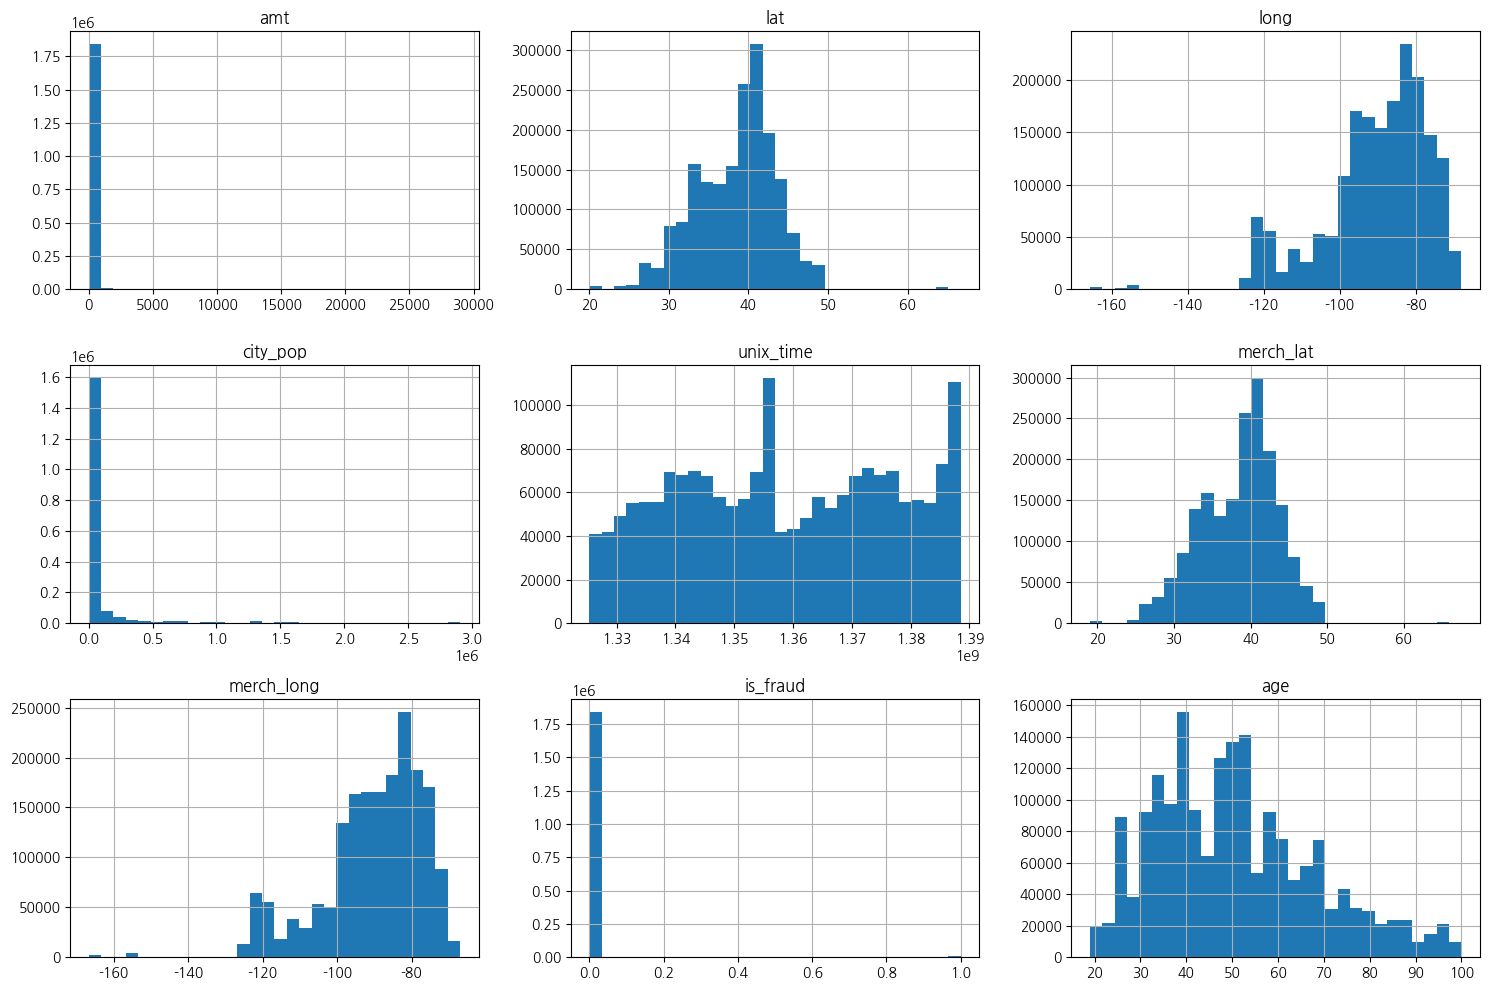

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 변수 분포 시각화
# 숫자형 변수들의 히스토그램
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


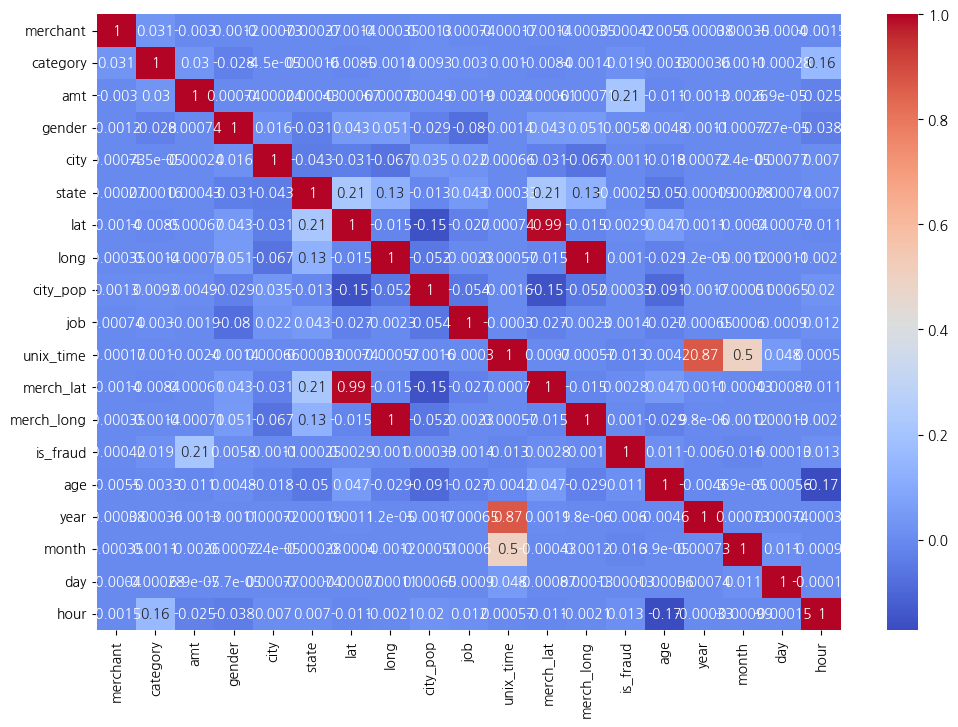

is_fraud      1.000000
amt           0.209308
category      0.019278
hour          0.013196
age           0.011103
gender        0.005844
lat           0.002904
merch_lat     0.002778
long          0.001022
merch_long    0.000999
city_pop      0.000325
day          -0.000131
state        -0.000252
merchant     -0.000424
city         -0.001107
job          -0.001388
year         -0.006022
unix_time    -0.013329
month        -0.016417
Name: is_fraud, dtype: float64


In [13]:
# 날짜 및 시간을 연도, 월, 일, 시간으로 분리
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], errors='coerce')
data['year'] = data['trans_date_trans_time'].dt.year
data['month'] = data['trans_date_trans_time'].dt.month
data['day'] = data['trans_date_trans_time'].dt.day
data['hour'] = data['trans_date_trans_time'].dt.hour

# 원본 trans_date_trans_time 컬럼 제거
data = data.drop(columns=['trans_date_trans_time'])

# LabelEncoder 패키지 불러오기
from sklearn.preprocessing import LabelEncoder

# 범주형 변수 인코딩 (Label Encoding)
categorical_cols = ['merchant', 'category', 'gender', 'job', 'city', 'state']
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# 상관관계 계산
corr_matrix = data.corr()

# 상관관계 시각화 (히트맵)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# 타겟 변수 'is_fraud'와 상관관계가 높은 피처 확인
print(corr_matrix['is_fraud'].sort_values(ascending=False))



In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 19 columns):
 #   Column      Dtype  
---  ------      -----  
 0   merchant    int64  
 1   category    int64  
 2   amt         float64
 3   gender      int64  
 4   city        int64  
 5   state       int64  
 6   lat         float64
 7   long        float64
 8   city_pop    int64  
 9   job         int64  
 10  unix_time   int64  
 11  merch_lat   float64
 12  merch_long  float64
 13  is_fraud    int64  
 14  age         int32  
 15  year        int32  
 16  month       int32  
 17  day         int32  
 18  hour        int32  
dtypes: float64(5), int32(5), int64(9)
memory usage: 233.2 MB


* trans_date_trans_time (object): 거래가 발생한 날짜 및 시간
* merchant (object): 상점명 또는 거래가 발생한 가맹점의 이름
* category (object): 거래가 발생한 상품 또는 서비스의 범주
* amt (float64): 해당 거래의 거래 금액
* gender (object): 카드 소유자의 성별
* street (object): 카드 소유자의 거주지 주소의 거리
* city (object): 카드 소유자의 거주지 도시
* state (object): 카드 소유자의 거주지 주(State)
* lat (float64): 카드 소유자의 거주지 위도(latitude)
* long (float64): 카드 소유자의 거주지 경도(longitude)
* city_pop (int64): 카드 소유자가 거주하는 도시의 인구 수
* job (object): 카드 소유자의 직업
* unix_time (int64): 거래가 발생한 시간을 유닉스 타임스탬프 형식으로 나타낸 값
* merch_lat (float64): 가맹점의 위도(latitude) 거래가 발생한 상점의 위치 정보
* merch_long (float64): 가맹점의 경도(longitude)
* is_fraud (int64): 거래가 사기(fraud)여부를 나타내는 열입니다. 1은 사기, 0은 정상 거래
* age ( int32)  

In [15]:
data.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,year,month,day,hour
0,514,8,4.97,0,532,27,36.0788,-81.1781,3495,372,1325376018,36.011293,-82.048315,0,36,2019,1,1,0
1,241,4,107.23,0,619,47,48.8878,-118.2105,149,431,1325376044,49.159047,-118.186462,0,46,2019,1,1,0
2,390,0,220.11,1,474,13,42.1808,-112.2620,4154,308,1325376051,43.150704,-112.154481,0,62,2019,1,1,0
3,360,2,45.00,1,84,26,46.2306,-112.1138,1939,330,1325376076,47.034331,-112.561071,0,57,2019,1,1,0
4,297,9,41.96,1,217,45,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0,38,2019,1,1,0


In [16]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# 1. Feature Selection: 상관계수가 높은 변수 선택
# amt와 상관관계가 높은 변수들만 선택 (임의로 0.01 이상인 것들)
selected_features = ['amt', 'category', 'hour', 'age', 'gender', 'lat', 'merch_lat']

X = data[selected_features]
y = data['is_fraud']

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 모델 설정
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# 4. 하이퍼파라미터 그리드 설정 (GridSearch를 위한)
param_grid = {
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [10, 20, None]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [10, 20]}
}

# 5. K-fold 교차검증 및 GridSearchCV 적용
best_models = {}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    grid = GridSearchCV(model, param_grid[name], cv=kfold, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_

# 6. 모델 성능 비교 및 평가
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

RandomForest Accuracy: 0.9987
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.96      0.79      0.87      1953

    accuracy                           1.00    370479
   macro avg       0.98      0.90      0.93    370479
weighted avg       1.00      1.00      1.00    370479

XGBoost Accuracy: 0.9987
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.93      0.81      0.87      1953

    accuracy                           1.00    370479
   macro avg       0.97      0.90      0.93    370479
weighted avg       1.00      1.00      1.00    370479

LogisticRegression Accuracy: 0.9943
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50    